tobac example: Tracking isolated convection based on updraft velocity and total condensate
==

This example notebook demonstrates the use of tobac to track isolated deep convective clouds in cloud-resolving model simulation output based on vertical velocity and total condensate mixing ratio.

The simulation results used in this example were performed as part of the ACPC deep convection intercomparison  case study (http://acpcinitiative.org/Docs/ACPC_DCC_Roadmap_171019.pdf) with WRF using the Morrison microphysics scheme. 

The data used in this example is downloaded from "zenodo link" automatically as part of the notebooks (This only has to be done once for all the tobac example notebooks).

**Import libraries:**

In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import shutil
from six.moves import urllib
from pathlib import Path
%matplotlib inline

In [2]:
# Import tobac itself:
import tobac
print('using tobac version', str(tobac.__version__))

using tobac version 1.5


In [3]:
#Disable a couple of warnings:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)


**Download and load example data:**   
The actual dowloading is only necessary once for all example notebooks.

In [4]:
data_out=Path('../')

In [5]:
# Download the data: This only has to be done once for all tobac examples and can take a while
data_file = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))
if len(data_file) == 0:
    file_path='https://zenodo.org/record/3195910/files/climate-processes/tobac_example_data-v1.0.1.zip'
    #file_path='http://zenodo..'
    tempfile=Path('temp.zip')
    print('start downloading data')
    request=urllib.request.urlretrieve(file_path, tempfile)
    print('start extracting data')
    shutil.unpack_archive(tempfile, data_out)
    tempfile.unlink()
    print('data extracted')
    data_file = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))

**Load Data from downloaded file:**

In [6]:
data_file_W_mid_max = list(data_out.rglob('data/Example_input_midlevelUpdraft.nc'))[0]
data_file_TWC = list(data_out.rglob('data/Example_input_Condensate.nc'))[0]

In [7]:
W_mid_max=iris.load_cube(data_file_W_mid_max,'w')
TWC=iris.load_cube(data_file_TWC,'TWC')

In [8]:
# Display information about the two cubes for vertical velocity and total condensate mixing ratio:
display(W_mid_max)
display(TWC)

<iris 'Cube' of w / (m s-1) (time: 47; south_north: 198; west_east: 198)>

<iris 'Cube' of TWC / (kg kg-1) (time: 47; bottom_top: 94; south_north: 198; west_east: 198)>

In [9]:
#Set up directory to save output and plots:
savedir=Path("Save")
if not savedir.is_dir():
    savedir.mkdir()
plot_dir=Path("Plot")
if not plot_dir.is_dir():
    plot_dir.mkdir()

**Feature detection:**

Perform feature detection based on midlevel maximum vertical velocity and a range of threshold values.

In [10]:
# Determine temporal and spatial sampling of the input data:
dxy,dt=tobac.get_spacings(W_mid_max)

In [11]:
# Keyword arguments for feature detection step:
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_distance']=0
parameters_features['sigma_threshold']=1
parameters_features['threshold']=[3,5,10] #m/s
parameters_features['n_erosion_threshold']=0
parameters_features['n_min_threshold']=3

In [12]:
# Perform feature detection and save results:
print('start feature detection based on midlevel column maximum vertical velocity')
dxy,dt=tobac.get_spacings(W_mid_max)
Features=tobac.feature_detection_multithreshold(W_mid_max,dxy,**parameters_features)
print('feature detection performed start saving features')
Features.to_hdf(savedir / 'Features.h5', 'table')
print('features saved')


start feature detection based on midlevel column maximum vertical velocity
feature detection performed start saving features
features saved


In [13]:
Features

frame  idx      hdim_1      hdim_2  num  threshold_value  feature  \
0        0    3   86.765659   53.350266   10                3        1   
1        0    6  109.581883   65.230958    7                3        2   
2        0    8  116.808699  191.185786    6                3        3   
3        0   12  155.613171   33.200565    5                3        4   
4        0   14   84.857363   37.092481   43                5        5   
..     ...  ...         ...         ...  ...              ...      ...   
624     46   36  144.848990  116.270462   51               10      625   
625     46   38  158.442623  106.995282    6               10      626   
626     46   39  172.189120    3.980561   53               10      627   
627     46   40  186.763110  101.952079   17               10      628   
628     46   41  190.393192  179.765727    4               10      629   

                    time              timestr  south_north   west_east  \
0    2013-06-19 20:05:00  2013-06-19 20:05:00   367.765659  334.350266   
1    2013-06-19 20:05:00  2013-06-19 20:05:00   390.581883  346.230958   
2    2013-06-19 20:05:00  2013-06-19 20:05:00   397.808699  472.185786   
3    2013-06-19 20:05:00  2013-06-19 20:05:00   436.613171  314.200565   
4    2013-06-19 20:05:00  2013-06-19 20:05:00   365.857363  318.092481   
..                   ...                  ...          ...         ...   
624  2013-06-19 23:55:00  2013-06-19 23:55:00   425.848990  397.270462   
625  2013-06-19 23:55:00  2013-06-19 23:55:00   439.442623  387.995282   
626  2013-06-19 23:55:00  2013-06-19 23:55:00   453.189120  284.980561   
627  2013-06-19 23:55:00  2013-06-19 23:55:00   467.763110  382.952079   
628  2013-06-19 23:55:00  2013-06-19 23:55:00   471.393192  460.765727   

     bottom_top_stag  model_level_number  projection_y_coordinate           y  \
0         334.350266          334.350266            184132.829257  367.765659   
1         346.230958          346.230958            195540.941390  390.581883   
2         472.185786          472.185786            199154.349360  397.808699   
3         314.200565          314.200565            218556.585318  436.613171   
4         318.092481          318.092481            183178.681637  365.857363   
..               ...                 ...                      ...         ...   
624       397.270462          397.270462            213174.494771  425.848990   
625       387.995282          387.995282            219971.311750  439.442623   
626       284.980561          284.980561            226844.559837  453.189120   
627       382.952079          382.952079            234131.555024  467.763110   
628       460.765727          460.765727            235946.595843  471.393192   

      latitude  longitude  projection_x_coordinate           x  
0    30.016039 -94.626851            167425.132894  334.350266  
1    30.120045 -94.563725            173365.479208  346.230958  
2    30.149162 -93.898384            236342.893153  472.185786  
3    30.330711 -94.732272            157350.282423  314.200565  
4    30.007545 -94.712620            159296.240490  318.092481  
..         ...        ...                      ...         ...  
624  30.279932 -94.293102            198885.230853  397.270462  
625  30.342259 -94.341747            194247.641224  387.995282  
626  30.406632 -94.886785            142740.280723  284.980561  
627  30.471714 -94.367601            191726.039457  382.952079  
628  30.485680 -93.955138            230632.863513  460.765727  

[629 rows x 19 columns]

**Segmentation:**  
Perform segmentation based on 3D total condensate field to determine cloud volumes associated to identified features:

In [14]:
parameters_segmentation_TWC={}
parameters_segmentation_TWC['method']='watershed'
parameters_segmentation_TWC['threshold']=0.1e-3  # kg/kg mixing ratio

In [15]:
print('Start segmentation based on total water content')
Mask_TWC,Features_TWC=tobac.segmentation_3D(Features,TWC,dxy,**parameters_segmentation_TWC)
print('segmentation TWC performed, start saving results to files')
iris.save([Mask_TWC], savedir / 'Mask_Segmentation_TWC.nc',zlib=True,complevel=4)
Features_TWC.to_hdf(savedir / 'Features_TWC.h5','table')
print('segmentation TWC performed and saved')

Start segmentation based on total water content
segmentation TWC performed, start saving results to files
segmentation TWC performed and saved


In [16]:
Mask_TWC

<iris 'Cube' of segmentation_mask / (1) (time: 47; bottom_top: 94; south_north: 198; west_east: 198)>

**Trajectory linking:**  
Detected features are linked into cloud trajectories using the trackpy library (http://soft-matter.github.io/trackpy). This takes the feature positions determined in the feature detection step into account but does not include information on the shape of the identified objects.

In [17]:
# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=100
parameters_linking['memory']=0
parameters_linking['time_cell_min']=5*60
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=10


In [18]:
# Perform linking and save results:
Track=tobac.linking_trackpy(Features,W_mid_max,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(savedir / 'Track.h5', 'table')


Frame 46: 18 trajectories present.


In [19]:
Track

frame  idx      hdim_1      hdim_2  num  threshold_value  feature  \
0        0    3   86.765659   53.350266   10                3        1   
1        0    6  109.581883   65.230958    7                3        2   
2        0    8  116.808699  191.185786    6                3        3   
3        0   12  155.613171   33.200565    5                3        4   
4        0   14   84.857363   37.092481   43                5        5   
..     ...  ...         ...         ...  ...              ...      ...   
624     46   36  144.848990  116.270462   51               10      625   
625     46   38  158.442623  106.995282    6               10      626   
626     46   39  172.189120    3.980561   53               10      627   
627     46   40  186.763110  101.952079   17               10      628   
628     46   41  190.393192  179.765727    4               10      629   

                    time              timestr  south_north  ...  \
0    2013-06-19 20:05:00  2013-06-19 20:05:00   367.765659  ...   
1    2013-06-19 20:05:00  2013-06-19 20:05:00   390.581883  ...   
2    2013-06-19 20:05:00  2013-06-19 20:05:00   397.808699  ...   
3    2013-06-19 20:05:00  2013-06-19 20:05:00   436.613171  ...   
4    2013-06-19 20:05:00  2013-06-19 20:05:00   365.857363  ...   
..                   ...                  ...          ...  ...   
624  2013-06-19 23:55:00  2013-06-19 23:55:00   425.848990  ...   
625  2013-06-19 23:55:00  2013-06-19 23:55:00   439.442623  ...   
626  2013-06-19 23:55:00  2013-06-19 23:55:00   453.189120  ...   
627  2013-06-19 23:55:00  2013-06-19 23:55:00   467.763110  ...   
628  2013-06-19 23:55:00  2013-06-19 23:55:00   471.393192  ...   

     bottom_top_stag  model_level_number  projection_y_coordinate           y  \
0         334.350266          334.350266            184132.829257  367.765659   
1         346.230958          346.230958            195540.941390  390.581883   
2         472.185786          472.185786            199154.349360  397.808699   
3         314.200565          314.200565            218556.585318  436.613171   
4         318.092481          318.092481            183178.681637  365.857363   
..               ...                 ...                      ...         ...   
624       397.270462          397.270462            213174.494771  425.848990   
625       387.995282          387.995282            219971.311750  439.442623   
626       284.980561          284.980561            226844.559837  453.189120   
627       382.952079          382.952079            234131.555024  467.763110   
628       460.765727          460.765727            235946.595843  471.393192   

      latitude  longitude  projection_x_coordinate           x  cell  \
0    30.016039 -94.626851            167425.132894  334.350266     1   
1    30.120045 -94.563725            173365.479208  346.230958     2   
2    30.149162 -93.898384            236342.893153  472.185786     3   
3    30.330711 -94.732272            157350.282423  314.200565    -1   
4    30.007545 -94.712620            159296.240490  318.092481     5   
..         ...        ...                      ...         ...   ...   
624  30.279932 -94.293102            198885.230853  397.270462   233   
625  30.342259 -94.341747            194247.641224  387.995282   230   
626  30.406632 -94.886785            142740.280723  284.980561   226   
627  30.471714 -94.367601            191726.039457  382.952079   218   
628  30.485680 -93.955138            230632.863513  460.765727   225   

          time_cell  
0   0 days 00:00:00  
1   0 days 00:00:00  
2   0 days 00:00:00  
3   0 days 00:00:00  
4   0 days 00:00:00  
..              ...  
624 0 days 00:10:00  
625 0 days 00:10:00  
626 0 days 00:15:00  
627 0 days 00:20:00  
628 0 days 00:15:00  

[629 rows x 21 columns]

**Visualisation:**  

In [20]:
# Set extent for maps plotted in the following cells ( in the form [lon_min,lon_max,lat_min,lat_max])
axis_extent=[-95,-93.8,29.5,30.6]        

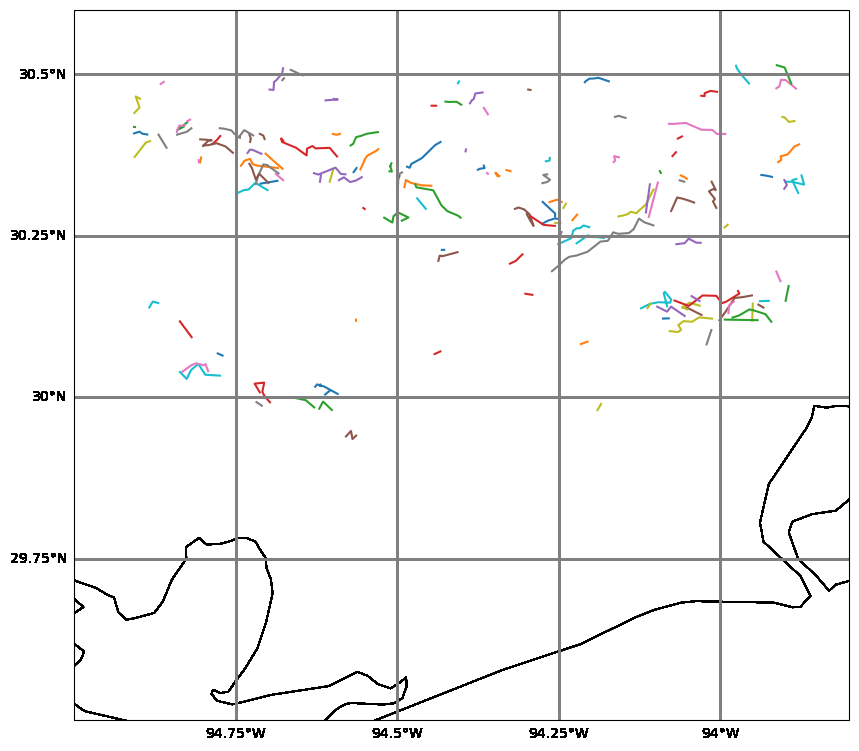

In [21]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent=axis_extent,axes=ax_map)

In [23]:
# Create animation showing tracked cells with outline of cloud volumes and the midlevel vertical velocity as a background field:
animation_tobac=tobac.animation_mask_field(track=Track,features=Features,field=W_mid_max,mask=Mask_TWC,
                                          axis_extent=axis_extent,#figsize=figsize,orientation_colorbar='horizontal',pad_colorbar=0.2,
                                          vmin=0,vmax=20,extend='both',cmap='Blues',
                                          interval=500,figsize=(10,7),
                                          plot_outline=True,plot_marker=True,marker_track='x',plot_number=True,plot_features=True)

In [24]:
# Display animation:
from IPython.display import HTML, Image, display
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

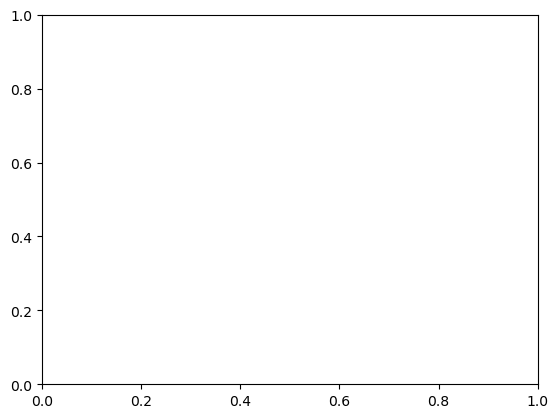

In [26]:
HTML(animation_tobac.to_jshtml())

Text(0, 0.5, 'counts')

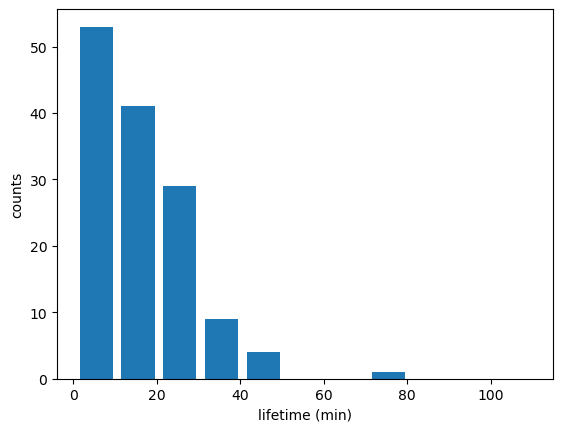

In [22]:
# Updraft lifetimes of tracked cells:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')
         